In [1]:
import pandas as pd
import numpy as np

In [2]:
def input2df(train_input_file, test_input_file):
    """
    Args:
        input_train_file:
        input_test_file:
    Return:
         pd.DataFrame train_df
         pd.DataFrame test_df
    """
    dtype_dict = {"age": np.int32,
                  "education-num": np.int32,
                  "capital - gain": np.int32,
                  "capital - loss": np.int32,
                  "hours - per - week": np.int32}
    use_list = list(range(15))
    use_list.remove(2)
    train_df = pd.read_csv(train_input_file, dtype=dtype_dict, na_values="?",usecols=use_list)
    print(train_df.shape)
    train_df.dropna(axis=0, how="any", inplace=True)
    test_df = pd.read_csv(test_input_file, dtype=dtype_dict, na_values="?",usecols=use_list)
    print(test_df.shape)
    test_df.dropna(axis=0, how="any", inplace=True)
    return train_df, test_df

In [3]:
train_df, test_df = input2df("./data/train.txt", "./data/test.txt")

(32561, 14)
(16281, 14)


In [4]:
train_df.head(20)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [5]:
print(train_df.shape, test_df.shape)

(30162, 14) (15060, 14)


In [6]:
print(train_df.columns, len(train_df.columns))

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'label'],
      dtype='object') 14


In [7]:
label = 'label'
con_features_li = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']
dis_features_li = ['education', 'workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex','native-country']

In [8]:
train_df['capital-gain'].describe()

count    30162.000000
mean      1092.007858
std       7406.346497
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64

In [9]:
import seaborn as sns


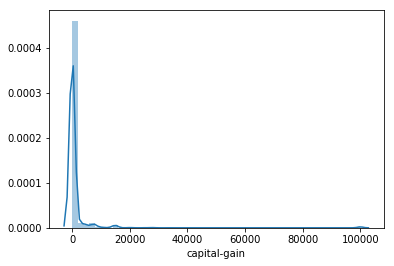

In [10]:
sns.distplot(train_df['capital-gain'])

In [11]:
def get_split_list(data_series):
    """
    Args:
        data_series: pandas.core.series.Series about con feature
    Return:
        split_dic: {'min': 17.0, '25%':28.0, ...}
    """
    split_list = []
    con_split = ['min', '25%', '50%', '75%', 'max']
    for k in con_split:
        split_list.append(data_series.describe()[k])
    return split_list

In [12]:
def dis_split_list(data_series):
    split_list = sorted(data_series.value_counts().to_dict().keys())
    return split_list

In [13]:

dic = train_df['workclass'].value_counts().to_dict()
li = sorted(dic.keys())
print(li, type(li))

['Federal-gov', 'Local-gov', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay'] <class 'list'>


In [14]:
def dis_feature2one(x, split_list):
    """
    return :0,0,0,1,0
    """
    length = len(split_list)
    zero_list = [0]*length
    if x in split_list:
        idx = split_list.index(x)
        zero_list[idx] = 1
    else:
        print("error")
    return ",".join([str(j) for j in zero_list])

def dis_featur_process(df, dis_feat_list):
    for feature in dis_feat_list:
        split_list = dis_split_list(df[feature])
        print("split_list:", split_list)
        df[feature] = df[feature].apply(dis_feature2one, args=(split_list, ))
    return df

def label_featur_process(df, label):
    def lable2one(x, one_label):
        if x == one_label:
            return 1
        else:
            return 0
    df[label] =  df[label].apply(lable2one, args=('>50K', ))
    return df

In [15]:
def con_feature2dim(x, split_list):
    """
    return :0,0,0,1,0
    """
    length = len(split_list)
    zero_list = [0]*(length-1)
    for i in range(length-1):
        if x >= split_list[i] and x < split_list[i+1]:
            zero_list[i] = 1
    else:
        if x == split_list[-1]:
            zero_list[-1] = 1
    return ",".join([str(j) for j in zero_list])
    
def con_feature_process(df, con_feat_list):
    for feature in con_feat_list:
        split_list = get_split_list(df[feature])
        print("split_dic:", split_list)
        df[feature] = df[feature].apply(con_feature2dim, args=(split_list, ))
    return df

In [16]:
train_df_1 = con_feature_process(train_df, con_features_li)

split_dic: [17.0, 28.0, 37.0, 47.0, 90.0]
split_dic: [1.0, 9.0, 10.0, 13.0, 16.0]
split_dic: [0.0, 0.0, 0.0, 0.0, 99999.0]
split_dic: [0.0, 0.0, 0.0, 0.0, 4356.0]
split_dic: [1.0, 40.0, 40.0, 45.0, 99.0]


In [17]:
train_df_1.head(20)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,"0,0,1,0",State-gov,Bachelors,"0,0,0,1",Never-married,Adm-clerical,Not-in-family,White,Male,"0,0,0,1","0,0,0,1","0,0,1,0",United-States,<=50K
1,"0,0,0,1",Self-emp-not-inc,Bachelors,"0,0,0,1",Married-civ-spouse,Exec-managerial,Husband,White,Male,"0,0,0,1","0,0,0,1","1,0,0,0",United-States,<=50K
2,"0,0,1,0",Private,HS-grad,"0,1,0,0",Divorced,Handlers-cleaners,Not-in-family,White,Male,"0,0,0,1","0,0,0,1","0,0,1,0",United-States,<=50K
3,"0,0,0,1",Private,11th,"1,0,0,0",Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,"0,0,0,1","0,0,0,1","0,0,1,0",United-States,<=50K
4,"0,1,0,0",Private,Bachelors,"0,0,0,1",Married-civ-spouse,Prof-specialty,Wife,Black,Female,"0,0,0,1","0,0,0,1","0,0,1,0",Cuba,<=50K
5,"0,0,1,0",Private,Masters,"0,0,0,1",Married-civ-spouse,Exec-managerial,Wife,White,Female,"0,0,0,1","0,0,0,1","0,0,1,0",United-States,<=50K
6,"0,0,0,1",Private,9th,"1,0,0,0",Married-spouse-absent,Other-service,Not-in-family,Black,Female,"0,0,0,1","0,0,0,1","1,0,0,0",Jamaica,<=50K
7,"0,0,0,1",Self-emp-not-inc,HS-grad,"0,1,0,0",Married-civ-spouse,Exec-managerial,Husband,White,Male,"0,0,0,1","0,0,0,1","0,0,0,1",United-States,>50K
8,"0,1,0,0",Private,Masters,"0,0,0,1",Never-married,Prof-specialty,Not-in-family,White,Female,"0,0,0,1","0,0,0,1","0,0,0,1",United-States,>50K
9,"0,0,1,0",Private,Bachelors,"0,0,0,1",Married-civ-spouse,Exec-managerial,Husband,White,Male,"0,0,0,1","0,0,0,1","0,0,1,0",United-States,>50K


In [18]:
train_df_2 = dis_featur_process(train_df_1, dis_features_li)

split_list: ['10th', '11th', '12th', '1st-4th', '5th-6th', '7th-8th', '9th', 'Assoc-acdm', 'Assoc-voc', 'Bachelors', 'Doctorate', 'HS-grad', 'Masters', 'Preschool', 'Prof-school', 'Some-college']
split_list: ['Federal-gov', 'Local-gov', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay']
split_list: ['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed']
split_list: ['Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial', 'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct', 'Other-service', 'Priv-house-serv', 'Prof-specialty', 'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving']
split_list: ['Husband', 'Not-in-family', 'Other-relative', 'Own-child', 'Unmarried', 'Wife']
split_list: ['Amer-Indian-Eskimo', 'Asian-Pac-Islander', 'Black', 'Other', 'White']
split_list: ['Female', 'Male']
split_list: ['Cambodia', 'Canada', 'China', 'Columbia', 'Cuba', 'Dominican-Republic', '

In [19]:
train_df_2.head(20)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,"0,0,1,0","0,0,0,0,0,1,0","0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0","0,0,0,1","0,0,0,0,1,0,0","1,0,0,0,0,0,0,0,0,0,0,0,0,0","0,1,0,0,0,0","0,0,0,0,1","0,1","0,0,0,1","0,0,0,1","0,0,1,0","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",<=50K
1,"0,0,0,1","0,0,0,0,1,0,0","0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0","0,0,0,1","0,0,1,0,0,0,0","0,0,0,1,0,0,0,0,0,0,0,0,0,0","1,0,0,0,0,0","0,0,0,0,1","0,1","0,0,0,1","0,0,0,1","1,0,0,0","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",<=50K
2,"0,0,1,0","0,0,1,0,0,0,0","0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0","0,1,0,0","1,0,0,0,0,0,0","0,0,0,0,0,1,0,0,0,0,0,0,0,0","0,1,0,0,0,0","0,0,0,0,1","0,1","0,0,0,1","0,0,0,1","0,0,1,0","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",<=50K
3,"0,0,0,1","0,0,1,0,0,0,0","0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0","1,0,0,0","0,0,1,0,0,0,0","0,0,0,0,0,1,0,0,0,0,0,0,0,0","1,0,0,0,0,0","0,0,1,0,0","0,1","0,0,0,1","0,0,0,1","0,0,1,0","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",<=50K
4,"0,1,0,0","0,0,1,0,0,0,0","0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0","0,0,0,1","0,0,1,0,0,0,0","0,0,0,0,0,0,0,0,0,1,0,0,0,0","0,0,0,0,0,1","0,0,1,0,0","1,0","0,0,0,1","0,0,0,1","0,0,1,0","0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",<=50K
5,"0,0,1,0","0,0,1,0,0,0,0","0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0","0,0,0,1","0,0,1,0,0,0,0","0,0,0,1,0,0,0,0,0,0,0,0,0,0","0,0,0,0,0,1","0,0,0,0,1","1,0","0,0,0,1","0,0,0,1","0,0,1,0","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",<=50K
6,"0,0,0,1","0,0,1,0,0,0,0","0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0","1,0,0,0","0,0,0,1,0,0,0","0,0,0,0,0,0,0,1,0,0,0,0,0,0","0,1,0,0,0,0","0,0,1,0,0","1,0","0,0,0,1","0,0,0,1","1,0,0,0","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...",<=50K
7,"0,0,0,1","0,0,0,0,1,0,0","0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0","0,1,0,0","0,0,1,0,0,0,0","0,0,0,1,0,0,0,0,0,0,0,0,0,0","1,0,0,0,0,0","0,0,0,0,1","0,1","0,0,0,1","0,0,0,1","0,0,0,1","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",>50K
8,"0,1,0,0","0,0,1,0,0,0,0","0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0","0,0,0,1","0,0,0,0,1,0,0","0,0,0,0,0,0,0,0,0,1,0,0,0,0","0,1,0,0,0,0","0,0,0,0,1","1,0","0,0,0,1","0,0,0,1","0,0,0,1","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",>50K
9,"0,0,1,0","0,0,1,0,0,0,0","0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0","0,0,0,1","0,0,1,0,0,0,0","0,0,0,1,0,0,0,0,0,0,0,0,0,0","1,0,0,0,0,0","0,0,0,0,1","0,1","0,0,0,1","0,0,0,1","0,0,1,0","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",>50K


In [20]:
for index, row in train_df_2.iterrows():
    print(index, row['workclass'])
    break

0 0,0,0,0,0,1,0


In [21]:
train_df_2 = label_featur_process(train_df_2, label)

In [22]:
train_df_2.head(20)

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,"0,0,1,0","0,0,0,0,0,1,0","0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0","0,0,0,1","0,0,0,0,1,0,0","1,0,0,0,0,0,0,0,0,0,0,0,0,0","0,1,0,0,0,0","0,0,0,0,1","0,1","0,0,0,1","0,0,0,1","0,0,1,0","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",0
1,"0,0,0,1","0,0,0,0,1,0,0","0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0","0,0,0,1","0,0,1,0,0,0,0","0,0,0,1,0,0,0,0,0,0,0,0,0,0","1,0,0,0,0,0","0,0,0,0,1","0,1","0,0,0,1","0,0,0,1","1,0,0,0","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",0
2,"0,0,1,0","0,0,1,0,0,0,0","0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0","0,1,0,0","1,0,0,0,0,0,0","0,0,0,0,0,1,0,0,0,0,0,0,0,0","0,1,0,0,0,0","0,0,0,0,1","0,1","0,0,0,1","0,0,0,1","0,0,1,0","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",0
3,"0,0,0,1","0,0,1,0,0,0,0","0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0","1,0,0,0","0,0,1,0,0,0,0","0,0,0,0,0,1,0,0,0,0,0,0,0,0","1,0,0,0,0,0","0,0,1,0,0","0,1","0,0,0,1","0,0,0,1","0,0,1,0","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",0
4,"0,1,0,0","0,0,1,0,0,0,0","0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0","0,0,0,1","0,0,1,0,0,0,0","0,0,0,0,0,0,0,0,0,1,0,0,0,0","0,0,0,0,0,1","0,0,1,0,0","1,0","0,0,0,1","0,0,0,1","0,0,1,0","0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",0
5,"0,0,1,0","0,0,1,0,0,0,0","0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0","0,0,0,1","0,0,1,0,0,0,0","0,0,0,1,0,0,0,0,0,0,0,0,0,0","0,0,0,0,0,1","0,0,0,0,1","1,0","0,0,0,1","0,0,0,1","0,0,1,0","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",0
6,"0,0,0,1","0,0,1,0,0,0,0","0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0","1,0,0,0","0,0,0,1,0,0,0","0,0,0,0,0,0,0,1,0,0,0,0,0,0","0,1,0,0,0,0","0,0,1,0,0","1,0","0,0,0,1","0,0,0,1","1,0,0,0","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...",0
7,"0,0,0,1","0,0,0,0,1,0,0","0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0","0,1,0,0","0,0,1,0,0,0,0","0,0,0,1,0,0,0,0,0,0,0,0,0,0","1,0,0,0,0,0","0,0,0,0,1","0,1","0,0,0,1","0,0,0,1","0,0,0,1","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",1
8,"0,1,0,0","0,0,1,0,0,0,0","0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0","0,0,0,1","0,0,0,0,1,0,0","0,0,0,0,0,0,0,0,0,1,0,0,0,0","0,1,0,0,0,0","0,0,0,0,1","1,0","0,0,0,1","0,0,0,1","0,0,0,1","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",1
9,"0,0,1,0","0,0,1,0,0,0,0","0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0","0,0,0,1","0,0,1,0,0,0,0","0,0,0,1,0,0,0,0,0,0,0,0,0,0","1,0,0,0,0,0","0,0,0,0,1","0,1","0,0,0,1","0,0,0,1","0,0,1,0","0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...",1


In [23]:
def add_total_feature(df):
    columns = [i for i in train_df_2.columns if i != 'label']
    onehot_series_list = [df[col].apply(lambda x :x.split(",")) for col in columns]
    total = onehot_series_list[0]
    for i in range(1, len(onehot_series_list)):
        total += onehot_series_list[i]
    df['total'] = total
    return df

In [24]:
train_df_3 = add_total_feature(train_df_2)

In [27]:
def write_series(filename, data_series):
    with open(filename, "w+") as f:
        for line in data_series:
            f.write("{}\n".format(",".join(line)))

In [28]:
write_series("./data/train_onehot.txt", train_df_3['total'])